# Exploring Differences Between Commonly Used Regression Methods on KC Housing Dataset

In [4]:
#Importing Basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
#Keep separate dataframe with numeric for visualizations

df_num = df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
df_num = df_num.set_index(keys = ['id'], drop = True)

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:xlabel='price', ylabel='sqft_basement'>

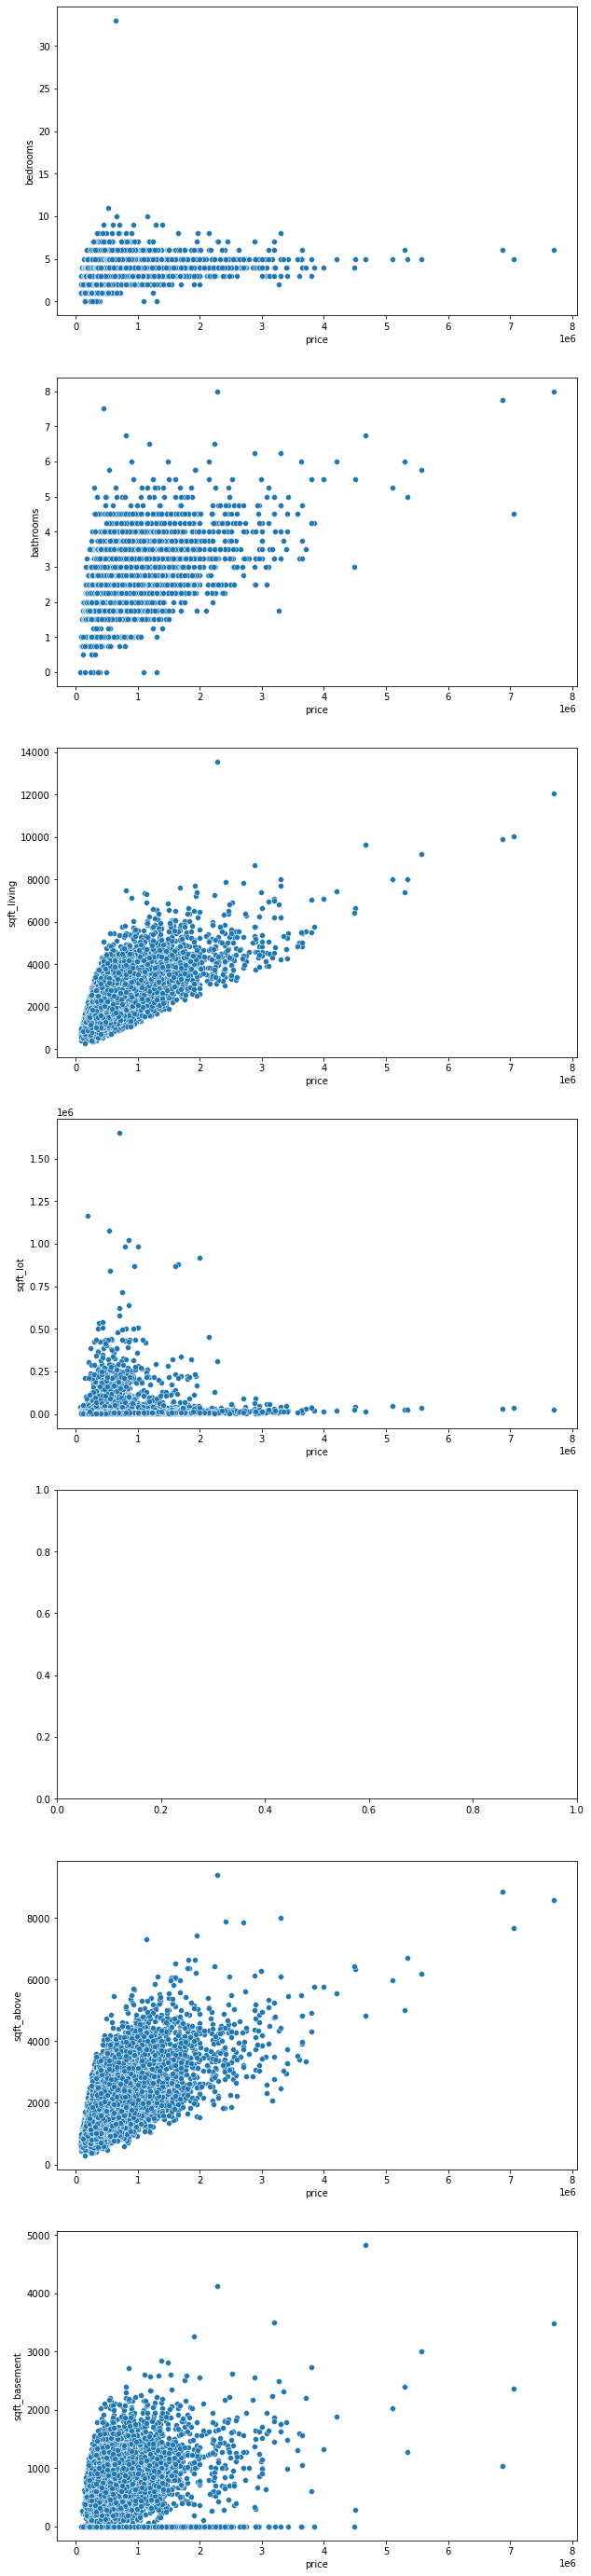

In [12]:

fig, axs = plt.subplots(figsize = (10, 50), nrows = 7, ncols = 1)

sns.scatterplot(x = 'price', y = 'bedrooms', data = df_num, ax = axs[0])
sns.scatterplot(x = 'price', y = 'bathrooms', data = df_num, ax = axs[1])
sns.scatterplot(x = 'price', y = 'sqft_living', data = df_num, ax = axs[2])
sns.scatterplot(x = 'price', y = 'sqft_lot', data = df_num, ax = axs[3])
sns.scatterplot(x = 'price', y = 'sqft_above', data = df_num, ax = axs[5])
sns.scatterplot(x = 'price', y = 'sqft_basement', data = df_num, ax = axs[6])

In [13]:
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
id,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1180,0,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2170,400,1690,7639
5631500400,180000.0,2,1.00,770,10000,770,0,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1050,910,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1680,0,1800,7503


In [14]:
df_cat = df.drop(labels = ['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15', 'lat', 'long'], axis = 1)
df_cat = df_cat.set_index(keys = ['id'])


In [15]:
df_cat.head()

,date,price,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
id,,,,,,,,,,
7129300520,20141013T000000,221900.0,1.0,0,0,3,7,1955,0,98178
6414100192,20141209T000000,538000.0,2.0,0,0,3,7,1951,1991,98125
5631500400,20150225T000000,180000.0,1.0,0,0,3,6,1933,0,98028
2487200875,20141209T000000,604000.0,1.0,0,0,5,7,1965,0,98136
1954400510,20150218T000000,510000.0,1.0,0,0,3,8,1987,0,98074


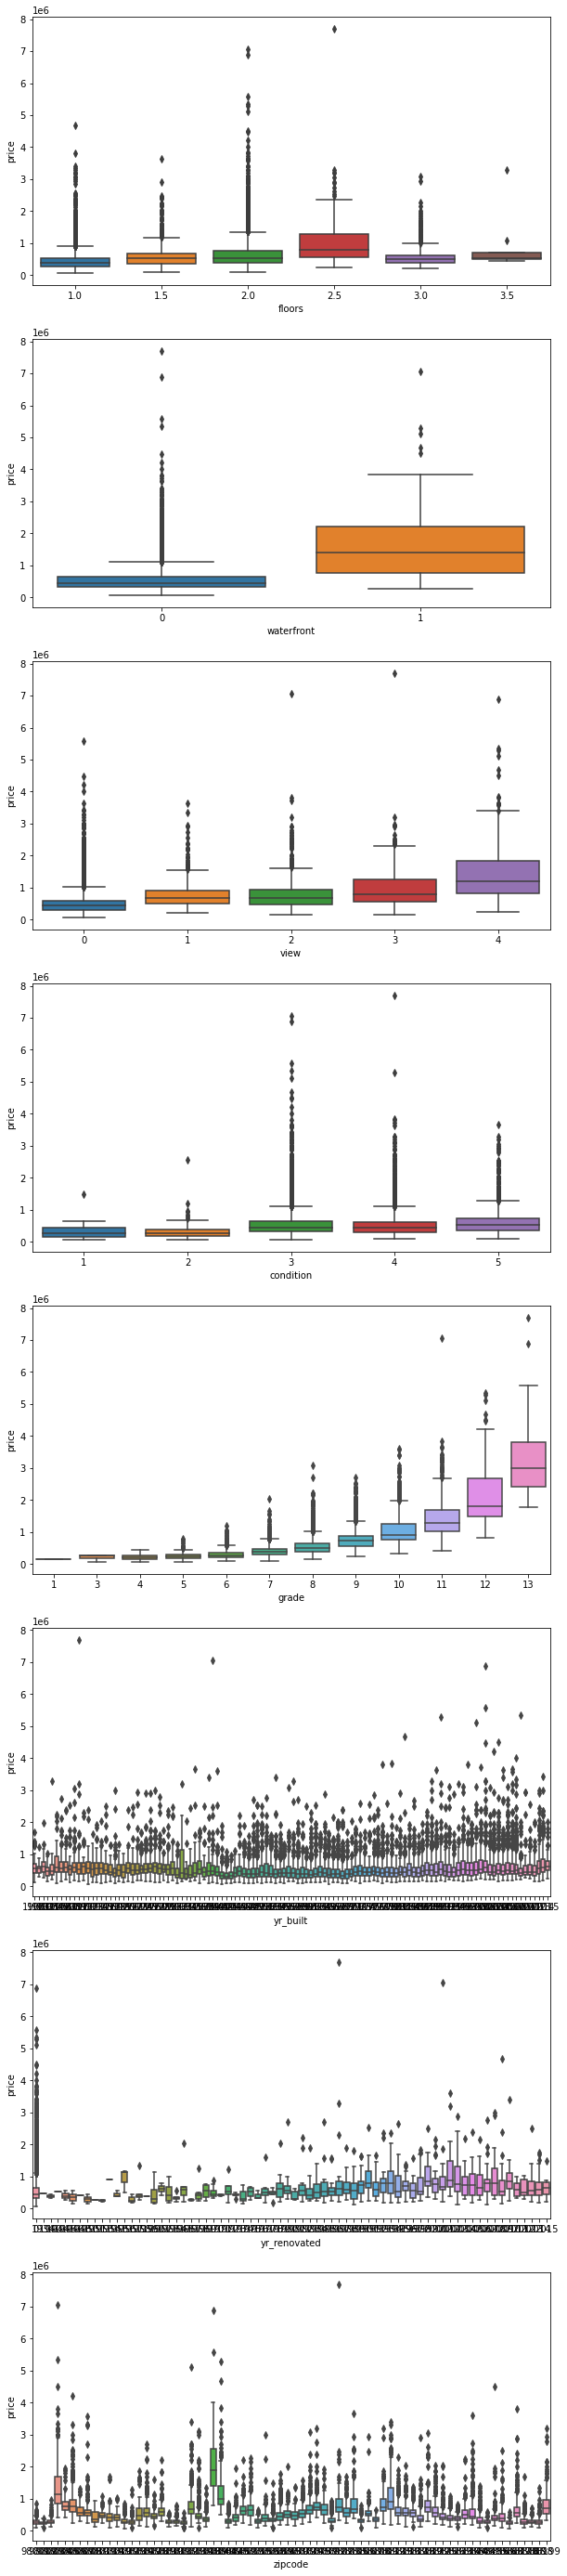

In [16]:
fig, cat_axs = plt.subplots(figsize = (10,50), nrows = df_cat.shape[1]-2, ncols = 1)

for i in range(len(df_cat.columns)-2):
    
    sns.boxplot(x = df_cat.columns[i+2],y = 'price',  data = df_cat, ax = cat_axs[i])

<AxesSubplot:xlabel='waterfront', ylabel='price'>

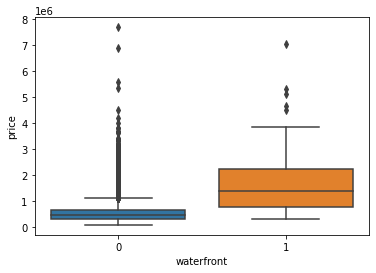

In [17]:
sns.boxplot(x = 'waterfront', y = 'price', data = df_cat)

In [18]:
df_cat.columns[3] == 'waterfront'

True

In [19]:
list(enumerate(df_num.columns))

[(0, 'price'),
 (1, 'bedrooms'),
 (2, 'bathrooms'),
 (3, 'sqft_living'),
 (4, 'sqft_lot'),
 (5, 'sqft_above'),
 (6, 'sqft_basement'),
 (7, 'sqft_living15'),
 (8, 'sqft_lot15')]

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [26]:


df['year'] = df['date'].str[0:4]
df['month'] = df['date'].str[4:6]

print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
0             1180      5650     1.0           0     0  ...              0   
1             2

In [27]:



pd.get_dummies(df, columns = ['waterfront','view','condition','grade','yr_built','yr_renovated','zipcode'], drop_first = True)




df_final = pd.get_dummies(df, columns = ['waterfront','view','condition','grade','yr_built','yr_renovated','zipcode','year', 'month'], drop_first = True)
df_final.drop(labels = ['date'], axis = 1, inplace = True)


In [28]:
df_final.set_index(keys = ['id'], inplace = True)
print(df_final)



               price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018   360000.0         3       2.50         1530      1131     3.0   
6600060120  400000.0         4       2.50         2310      5813     2.0   
1523300141  402101.0         2       0.75         1020      1350     2.0   
291310100   400000.0         3       2.50         1600      2388     2.0   
1523300157  325000.0         2       0.75         1020      1076     2.0   

           

In [29]:
X_train, X_test, y_train,y_test = train_test_split(df_final.drop('price', axis = 1).values, df_final['price'], test_size = 0.3, random_state = 42)

In [30]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [31]:
y_pred_lr = model_lr.predict(X_test)



C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

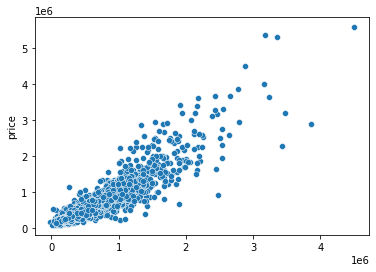

In [32]:
sns.scatterplot(y_pred_lr, y_test)

In [33]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)



DecisionTreeRegressor()

In [34]:
y_pred_dt = model_dt.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

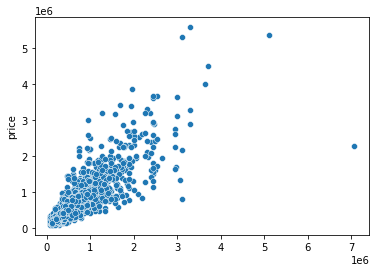

In [35]:
sns.scatterplot(y_pred_dt, y_test)

In [38]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)


RandomForestRegressor()

In [39]:
y_pred_rf = model_rf.predict(X_test)


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

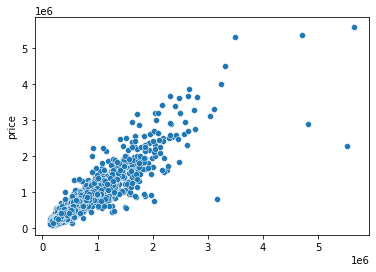

In [40]:
sns.scatterplot(y_pred_rf, y_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score


In [49]:
print("The MSE of the Linear Regression Model is :" + str(mean_squared_error(y_pred_lr, y_test)) + "\n")
print("The MSE of the Decision Tree Regressor Model is :" + str(mean_squared_error(y_pred_dt, y_test)) + "\n")
print("The MSE of the Random Forest Model is :" + str(mean_squared_error(y_pred_rf, y_test)) + "\n")

The MSE of the Linear Regression Model is :24576543073.84962

The MSE of the Decision Tree Regressor Model is :38487788268.570175

The MSE of the Random Forest Model is :21057077056.711815



In [50]:
df_final.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,47.560053,-122.213896,...,0.086753,0.103225,0.111692,0.100865,0.102300,0.089761,0.082080,0.086892,0.065285,0.068061
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,0.138564,0.140828,...,0.281480,0.304259,0.314994,0.301157,0.303049,0.285845,0.274493,0.281683,0.247033,0.251856
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,47.155900,-122.519000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,47.471000,-122.328000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,47.571800,-122.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,47.678000,-122.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,47.777600,-121.315000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
df2_pct15 = np.percentile(df_final['price'], q = 15)
df2_pct85 = np.percentile(df_final['price'], q = 85)

print(df2_pct15)
print(df2_pct85)

270000.0
779494.0000000005


In [77]:
df2_train = df_final[(df_final['price'] > df2_pct15) & (df_final['price'] < df2_pct85)]

In [78]:
df2_train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
id,,,,,,,,,,,,,,,,,,,,,
6414100192,538000.0,3,2.25,2570,7242,2.0,2170,400,47.7210,-122.319,...,0,0,0,0,0,0,0,0,0,1
2487200875,604000.0,4,3.00,1960,5000,1.0,1050,910,47.5208,-122.393,...,0,0,0,0,0,0,0,0,0,1
1954400510,510000.0,3,2.00,1680,8080,1.0,1680,0,47.6168,-122.045,...,0,0,0,0,0,0,0,0,0,0
2008000270,291850.0,3,1.50,1060,9711,1.0,1060,0,47.4095,-122.315,...,0,0,0,0,0,0,0,0,0,0
3793500160,323000.0,3,2.50,1890,6560,2.0,1890,0,47.3684,-122.031,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,1530,0,47.6993,-122.346,...,0,0,1,0,0,0,0,0,0,0
6600060120,400000.0,4,2.50,2310,5813,2.0,2310,0,47.5107,-122.362,...,0,0,0,0,0,0,0,0,0,0
1523300141,402101.0,2,0.75,1020,1350,2.0,1020,0,47.5944,-122.299,...,0,0,0,1,0,0,0,0,0,0


In [82]:
df2_test = df_final[(df_final['price'] <= df2_pct15) | (df_final['price'] >= df2_pct85)]

In [83]:
df2_test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,1180,0,47.5112,-122.257,...,0,0,0,0,0,0,0,1,0,0
5631500400,180000.0,2,1.00,770,10000,1.0,770,0,47.7379,-122.233,...,0,0,0,0,0,0,0,0,0,0
7237550310,1225000.0,4,4.50,5420,101930,1.0,3890,1530,47.6561,-122.005,...,0,0,1,0,0,0,0,0,0,0
1321400060,257500.0,3,2.25,1715,6819,2.0,1715,0,47.3097,-122.327,...,0,0,0,1,0,0,0,0,0,0
2414600126,229500.0,3,1.00,1780,7470,1.0,1050,730,47.5123,-122.337,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191100405,1575000.0,4,3.25,3410,10125,2.0,3410,0,47.5653,-122.223,...,0,1,0,0,0,0,0,0,0,0
7202300110,810000.0,4,3.00,3990,7838,2.0,3990,0,47.6857,-122.046,...,0,0,0,0,0,0,1,0,0,0
249000205,1537000.0,5,3.75,4470,8088,2.0,4470,0,47.6321,-122.200,...,0,0,0,0,0,0,0,1,0,0


In [85]:
X2_train = df2_train.drop(labels = 'price', axis = 1)
y2_train = df2_train['price']

In [86]:
X2_test = df2_test.drop(labels = 'price', axis = 1)
y2_test = df2_test['price']

In [87]:
model2_lr = LinearRegression()
model2_lr.fit(X2_train, y2_train)

LinearRegression()

In [88]:
y2_pred_lr = model2_lr.predict(X2_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

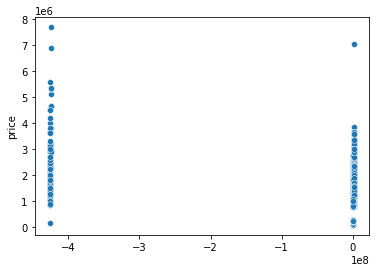

In [90]:
sns.scatterplot(y2_pred_lr, y2_test)

In [91]:
model2_dt = DecisionTreeRegressor()
model2_dt.fit(X2_train, y2_train)

DecisionTreeRegressor()

In [92]:
y2_pred_dt = model2_dt.predict(X2_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

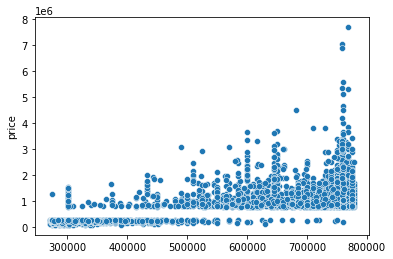

In [93]:
sns.scatterplot(y2_pred_dt, y2_test)